In [2]:
import shap 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_sensor_data = pd.read_csv("SensorData.csv")

In [8]:
y = df_sensor_data[['ID','Datetime','Daytime']].values
X = df_sensor_data.drop(['ID','Datetime','Daytime'], axis = 1)

X.describe()

,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,25.495766,26.717673,972.445216,585.630732,31.674317,43.349195
std,1.544276,4.647934,2.133553,70.648084,117.932525,146.484405
min,22.877633,19.940209,971.496321,202.000000,3.400000,6.100000
25%,23.010362,23.672215,972.151132,536.000000,4.600000,9.500000
50%,26.313355,24.397101,972.418327,545.000000,4.900000,10.800000
75%,26.497142,33.548111,972.716458,629.000000,5.300000,12.400000
max,27.640713,43.001648,1107.566634,1015.000000,913.000000,1238.000000


In [18]:
percentiles = np.linspace(0.76, 1, num=25, endpoint=True) #To generate an array of percentiles from 76(0.76) to 100(1.0)
X.quantile(percentiles)

,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10
0.76,26.497142,33.635612,972.725657,630.00,5.300,12.500
0.77,26.502247,33.760697,972.733536,630.00,5.400,12.600
0.78,26.507353,33.885608,972.738933,630.00,5.400,12.700
0.79,26.507353,33.996825,972.746291,631.00,5.500,12.800
0.80,26.517563,34.100606,972.753546,631.00,5.600,12.900
0.81,26.527773,34.136583,972.757172,631.00,5.600,13.100
0.82,26.532878,34.197606,972.761426,631.00,5.700,13.200
0.83,26.548194,34.271498,972.765678,632.00,5.800,13.400
0.84,26.558404,34.300625,972.769305,632.00,5.900,13.700
0.85,26.578825,34.340588,972.773557,632.00,6.200,14.000


In [19]:
from sklearn.ensemble import IsolationForest
iForest = IsolationForest(max_samples='auto', bootstrap=False, n_jobs=-1, random_state=42)
modelIForest = iForest.fit(X)
y_pred = modelIForest.predict(X)

In [21]:
y_score = modelIForest.decision_function(X)
neg_value_indices = np.where(y_score<0)
len(neg_value_indices[0])

574

In [27]:
explainer = shap.TreeExplainer(iForest)
shap_values = explainer.shap_values(X)
shap.initjs()

In [34]:
shap_values.shape

(4100, 6)

In [35]:
X.shape

(4100, 6)

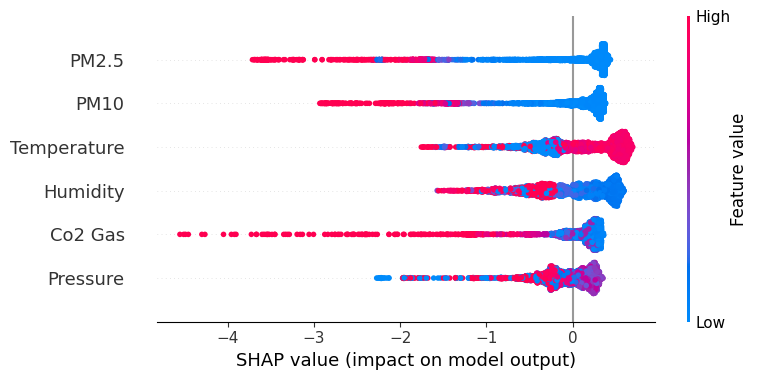

In [28]:
shap.summary_plot(shap_values, X)

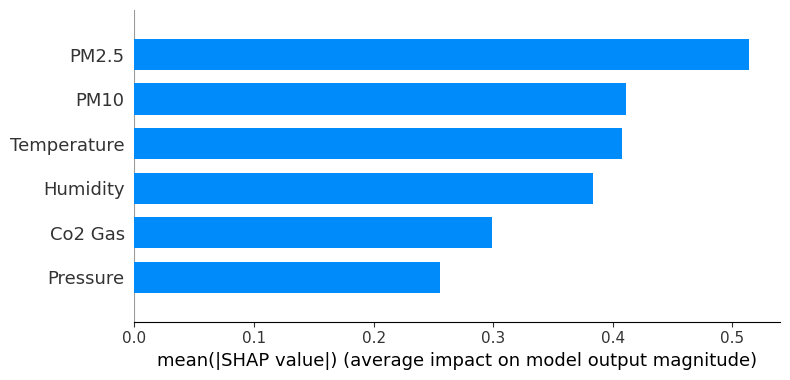

In [29]:
shap.summary_plot(shap_values, X, plot_type='bar')

In [30]:
shap.force_plot(explainer.expected_value, shap_values[1041], features=X.iloc[1041,:], feature_names=X.columns)

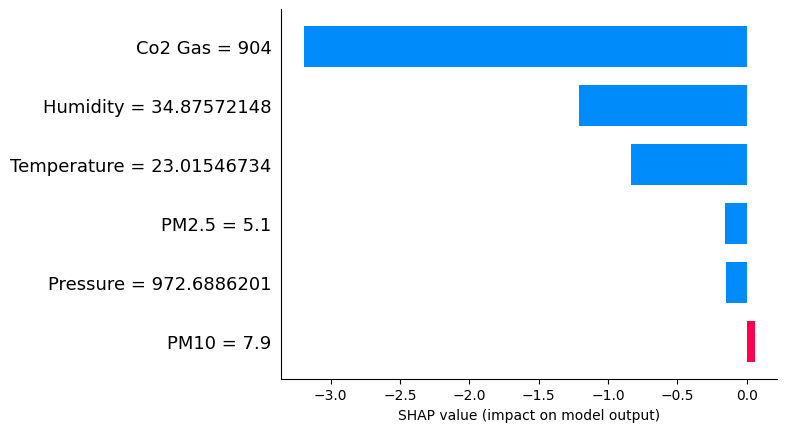

In [31]:
shap.bar_plot(shap_values[1041],features =X.iloc[1041,:] ,feature_names =X.columns )

In [32]:
explainer.expected_value

array([12.89598938])

In [39]:
N = 2_000
X = np.zeros((N, 5))

In [41]:
X.shape

(2000, 5)